# Weather Information

In [ ]:
!pip install meteostat


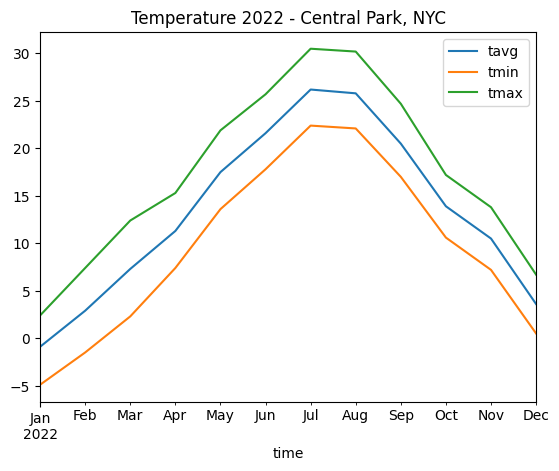

In [27]:
# Import Meteostat library and dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly

# Set time period
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Create Point for Vancouver, BC
tpr = Point(40.78325, -73.96565)

# Get daily data for 2018
data = Monthly(tpr, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'], title='Temperature 2022 - Central Park, NYC')
plt.show()

In [ ]:
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2022-01-01,-0.9,-4.9,2.4,98.4,11.9,1018.9,NaN
2022-02-01,2.9,-1.5,7.4,90.0,11.4,1023.0,NaN
2022-03-01,7.3,2.3,12.4,60.5,18.2,NaN,NaN
2022-04-01,11.3,7.4,15.3,177.7,11.8,1016.8,NaN
2022-05-01,17.5,13.6,21.9,111.7,9.1,1017.7,NaN
2022-06-01,21.6,17.8,25.7,55.4,7.6,1014.8,NaN
2022-07-01,26.2,22.4,30.5,52.3,7.4,1014.2,NaN
2022-08-01,25.8,22.1,30.2,48.9,7.4,1016.1,NaN
2022-09-01,20.5,17.0,24.7,58.4,7.9,1016.5,NaN


In [ ]:
df = pd.read_csv('/content/st_lat_long2.csv')

In [ ]:
def get_avg_temp(lat, long, start_dt= '2022-01-01', end_dt= '2022-12-01'):
  "Function to retrieve average temperature in a year given a lat and long location"

  # Set time period
  start = datetime.strptime(start_dt, '%Y-%m-%d')
  end= datetime.strptime(end_dt, '%Y-%m-%d')
  
  # Create Point
  tpr = Point(lat, long)

  # Get daily data for 2018
  data = Monthly(tpr, start, end)
  data = data.fetch()
    
  #Return
  try:
    return data['tmax'].mean().round(3)
  except:
    return 'NA'

In [ ]:
get_avg_temp(lat=35, long=-80.699)

16.558

In [ ]:
df.apply(lambda x: get_avg_temp(lat= x['Latitude'], long=x['Longitude']), axis=1 )

0       18.2
1     19.336
2       18.9
3       18.9
4     19.436
       ...  
66      24.7
67      24.7
68    22.745
69    22.745
70      21.9
Length: 71, dtype: object

In [32]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(40.78325, -73.96565)
station = stations.fetch(5)

# Print DataFrame
pd.DataFrame(station)

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
KNYC0,New York City / Yorkville,US,NY,<NA>,KNYC,40.7789,-73.9692,3.0,America/New_York,1943-12-01,2023-05-16,1943-12-02,2022-04-24,1944-01-01,2021-01-01,568.600598
KJRB0,New York / Wall Street,US,NY,<NA>,KJRB,40.7012,-74.0090,2.0,America/New_York,2016-07-20,2023-05-16,2016-07-21,2022-04-24,2019-01-01,2021-01-01,9827.360010
KTEB0,Teterboro,US,NJ,<NA>,KTEB,40.8501,-74.0608,3.0,America/New_York,1973-01-01,2023-05-16,1973-01-01,2022-04-24,2005-01-01,2022-01-01,10925.634388
72502,Newark Airport,US,NJ,72502,KEWR,40.6833,-74.0000,5.0,America/New_York,1973-01-01,2023-05-16,1893-01-01,2023-05-09,1893-01-01,2022-01-01,11484.614270
74486,John F. Kennedy Airport,US,NY,74486,KJFK,40.6333,-73.7667,4.0,America/New_York,1973-01-01,2023-05-16,1948-07-17,2023-05-09,1948-01-01,2022-01-01,23648.010088
